In [2]:
install.packages('nycflights13')
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# STATS 306
## Homework 1: Plotting and data manipulation

- Each problem is worth one or two points for a total of 10. 
- For each problem, enter the R code in the cell provided marked "YOUR SOLUTION HERE".

## Problem 1: Recap of Lecture 1 (2 pts)

**(a)** Write the command to install the package `tidyverse`. For this problem, you can comment out the command using # so that you do not need to reinstall your `tidyverse` package. Then, load the `tidyverse` package into your current environment.  _1/2 point_

In [ ]:
# Your solution here
library(tidyverse)

**(b)** Write the command to get more information on the `trees` data set. What is the `trees` dataset about? Output the `trees` first 6 rows of the data set. _1 point_

The trees dataset is about the diameter, height and volume of timber in 31 felled black cherry trees.

In [ ]:
# Your solution here
?trees
head(trees, 6)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


**(c)** How many rows and columns does `trees` have?  _1/2 point_

The trees dataset has 31 rows and 3 columns.

In [ ]:
# Your solution here
print(trees)

   Girth Height Volume
1    8.3     70   10.3
2    8.6     65   10.3
3    8.8     63   10.2
4   10.5     72   16.4
5   10.7     81   18.8
6   10.8     83   19.7
7   11.0     66   15.6
8   11.0     75   18.2
9   11.1     80   22.6
10  11.2     75   19.9
11  11.3     79   24.2
12  11.4     76   21.0
13  11.4     76   21.4
14  11.7     69   21.3
15  12.0     75   19.1
16  12.9     74   22.2
17  12.9     85   33.8
18  13.3     86   27.4
19  13.7     71   25.7
20  13.8     64   24.9
21  14.0     78   34.5
22  14.2     80   31.7
23  14.5     74   36.3
24  16.0     72   38.3
25  16.3     77   42.6
26  17.3     81   55.4
27  17.5     82   55.7
28  17.9     80   58.3
29  18.0     80   51.5
30  18.0     80   51.0
31  20.6     87   77.0


**(d)** To create a scatterplot using `Height` and `Volume` variables in the `trees` data
frame, Professor Terhorst uses the following command

```
ggplot() +
    geom_point(mapping = (x = Height, y = Volume))
```

and R produces an error. 

Fix Professor Terhorst's code and type it below to produce a scatterplot. Output your results.  _1 point_

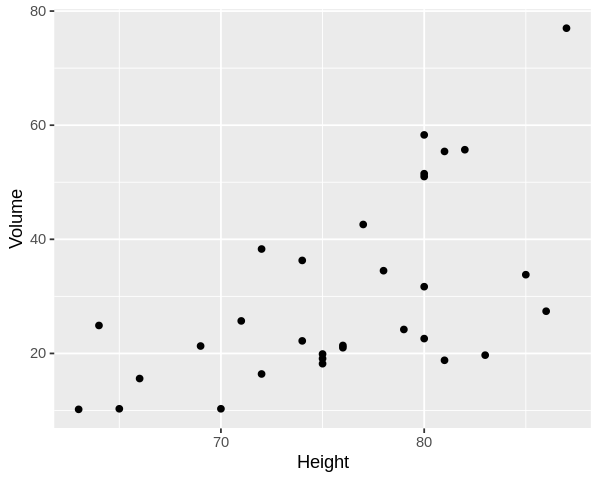

In [ ]:
# Your solution here
ggplot(data = trees,
       mapping = aes(x = Height, y = Volume)) +
geom_point()

## Problem 2: Animals (3 pts)
Problems 2 is based on the `animals` table, which is defined for you in the next cell.

In [ ]:
library(MASS)
animals <- as_tibble(MASS::Animals) %>% mutate(species = rownames(MASS::Animals))

**(a)** How are brain mass and body mass related? Following the examples we saw in Lecture 1, reproduce the following two plots: _2 points_


<img src="http://www-personal.umich.edu/~jonth/images/hw1/fig1.png" width="500" />
<img src="http://www-personal.umich.edu/~jonth/images/hw1/fig2.png" width="500" />

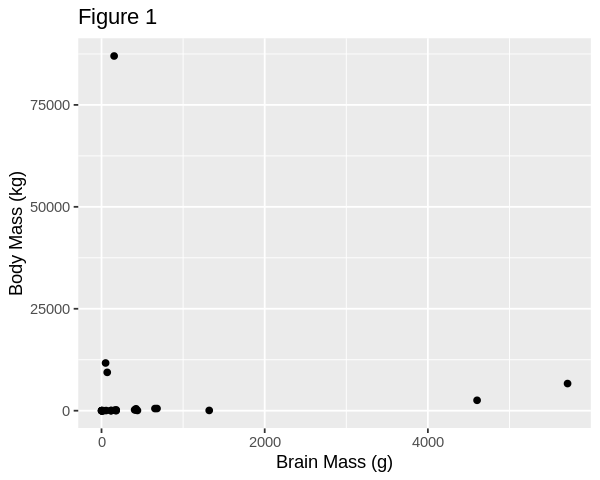

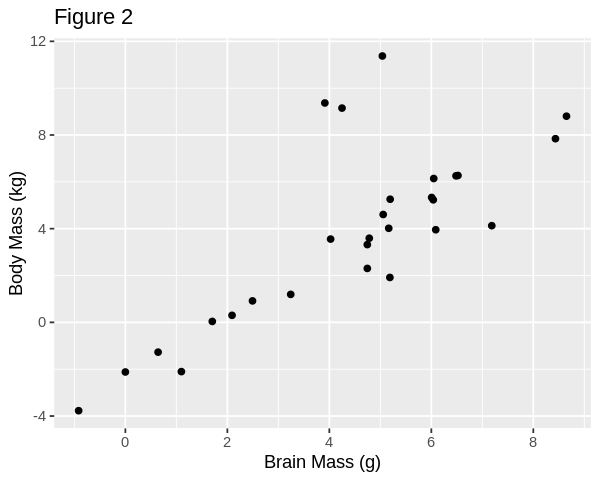

In [ ]:
# Your solution here
ggplot(data = animals,
       mapping = aes(x = brain, y = body)) +
geom_point() +
ggtitle("Figure 1") +
xlab("Brain Mass (g)") +
ylab("Body Mass (kg)")

ggplot(data = animals,
       mapping = aes(x = log(brain), y = log(body))) +
geom_point() +
ggtitle("Figure 2") +
xlab("Brain Mass (g)") +
ylab("Body Mass (kg)")

**(b)**
The preceding plot indicates that the log of brain mass is linearly related to the log of body mass. Check this by computing the correlation of brain mass with body mass, and compare that with the correlation between the logs of those two quantities. (*Hint*: R contains a built-in function for computing the correlation of two vectors.) _1 point_

In [ ]:
# Your solution here
cor(animals$brain, animals$body)
cor(log(animals$brain), log(animals$body))

[1] -0.005341163

[1] 0.7794935

## Problem 3: Flights (3 pts)
This problem looks at the `flights` dataset, which was already loaded at the begginning of this notebook.

**(a)** The following command lists the top six destinations in this dataset:

In [5]:
dest_top6 <- count(flights, dest) %>% top_n(6) %>% print

Selecting by n


# A tibble: 6 × 2
  dest      n
  <chr> <int>
1 ATL   17215
2 BOS   15508
3 CLT   14064
4 LAX   16174
5 MCO   14082
6 ORD   17283


Use `filter()` to subset the flights table down to only those for the top six destinations. You should end up with a table that has 94,326 rows, the first ten of which look like:  _1/2 point_

    # A tibble: 94,326 × 19
        year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
       <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
     1  2013     1     1      554            600        -6      812            837
     2  2013     1     1      554            558        -4      740            728
     3  2013     1     1      557            600        -3      838            846
     4  2013     1     1      558            600        -2      753            745
     5  2013     1     1      558            600        -2      924            917
     6  2013     1     1      559            559         0      702            706
     7  2013     1     1      600            600         0      837            825
     8  2013     1     1      606            610        -4      837            845
     9  2013     1     1      608            600         8      807            735
    10  2013     1     1      615            615         0      833            842
    # … with 94,316 more rows, and 11 more variables: arr_delay <dbl>,
    #   carrier <chr>, flight <int>, tailnum <chr>, origin <chr>, dest <chr>,
    #   air_time <dbl>, distance <dbl>, hour <dbl>, minute <dbl>, time_hour <dttm>

In [39]:
# Your solution here
new_df = filter(flights, dest %in% c("ATL", "BOS", "CLT", "LAX", "MCO", "ORD"))
print(new_df)

# A tibble: 94,326 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      554        600      -6     812     837     -25 DL     
 2  2013     1     1      554        558      -4     740     728      12 UA     
 3  2013     1     1      557        600      -3     838     846      -8 B6     
 4  2013     1     1      558        600      -2     753     745       8 AA     
 5  2013     1     1      558        600      -2     924     917       7 UA     
 6  2013     1     1      559        559       0     702     706      -4 B6     
 7  2013     1     1      600        600       0     837     825      12 MQ     
 8  2013     1     1      606        610      -4     837     845      -8 DL     
 9  2013     1     1      608        600       8     807     735      32 MQ     
10  2013     1     1      615        615       0     833     842      -9 DL     
# … 

**(b)** Using the table you created in part (a), recreate the following plot showing the density of arrival delays for the top six destinations: _2 points_

<img src="http://www-personal.umich.edu/~jonth/images/hw1/prob_3b.png" width="600" />

Warning message:
“Removed 2234 rows containing non-finite values (`stat_density()`).”


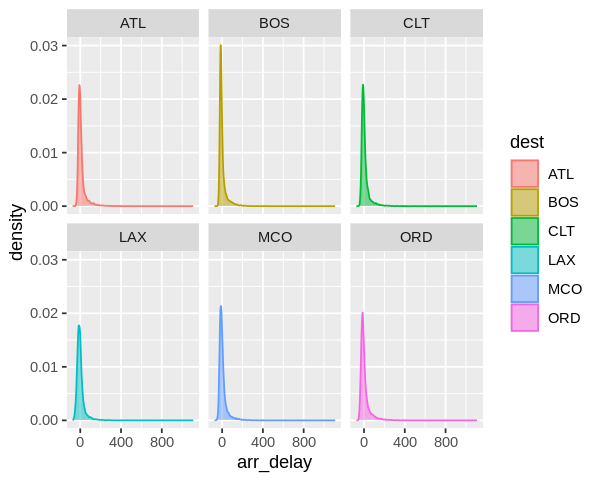

In [5]:
# Your solution here
ggplot(new_df, aes(x = arr_delay, color = dest, fill = dest)) +
          geom_density(alpha = 0.5) +
          facet_wrap(~ dest)

**(c)** Adjust the plot from part (b) to recreate the following plot, which only shows flights which had an arrival delay of $\pm$ 1 hour: _1/2 point_

<img src="http://www-personal.umich.edu/~jonth/images/hw1/prob_3c.png" width="600" />

Warning message:
“Removed 8083 rows containing non-finite values (`stat_density()`).”


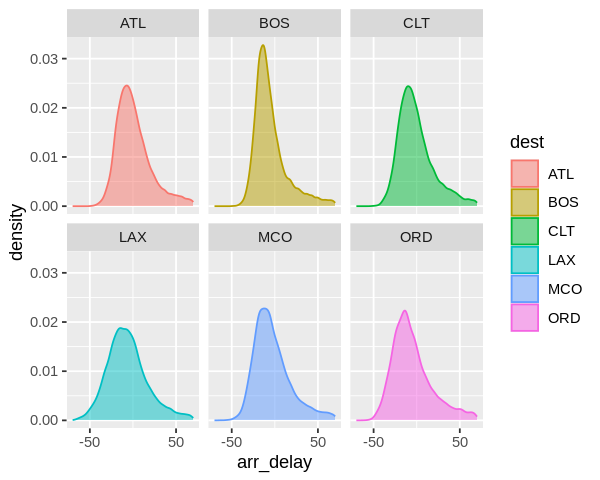

In [10]:
# Your solution here
ggplot(new_df, aes(x = arr_delay, color = dest, fill = dest)) +
          geom_density(alpha = 0.5) +
          facet_wrap(~ dest) +
          scale_x_continuous(limits = c(-70, 70), breaks = c(-50, 50))

## Problem 4: Challenge Problem (2 pts)

Each problem set will feature one or two questions that go a bit beyond what we have covered in lab and lecture. The goal of these is for you learn how to use online resources (R's help, Google, Stack Overflow, etc.) to solve programming challenges that you have not encountered before. This is an important skill which you will use constantly as data scientists in the real world.

Load the `diamonds` data set, and use it to reproduce the following box-and-whisker plot which shows the distribution of diamond price as a function of the quality of its `cut`.

<img src="http://www-personal.umich.edu/~jonth/images/hw1/prob4.png" width="500" />

Warning message:
“Removed 312 rows containing non-finite values (`stat_boxplot()`).”


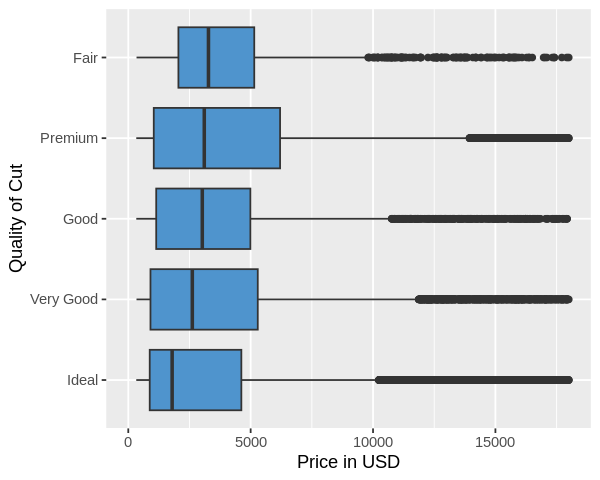

In [54]:
# Your solution here
#head(diamonds)
diamonds$cut <- factor(diamonds$cut, levels=c("Ideal", "Very Good", "Good", "Premium", "Fair"))
ggplot(diamonds, aes(x = price, y = cut)) + 
  geom_boxplot(fill = "steelblue3") + 
    scale_x_continuous(limits = c(0, 18000), breaks = c(0, 5000, 10000, 15000)) +
    xlab("Price in USD") +
    ylab("Quality of Cut")